In [1]:
#Let's import necessary libraries.

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\singh\Files-main\diabetes.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


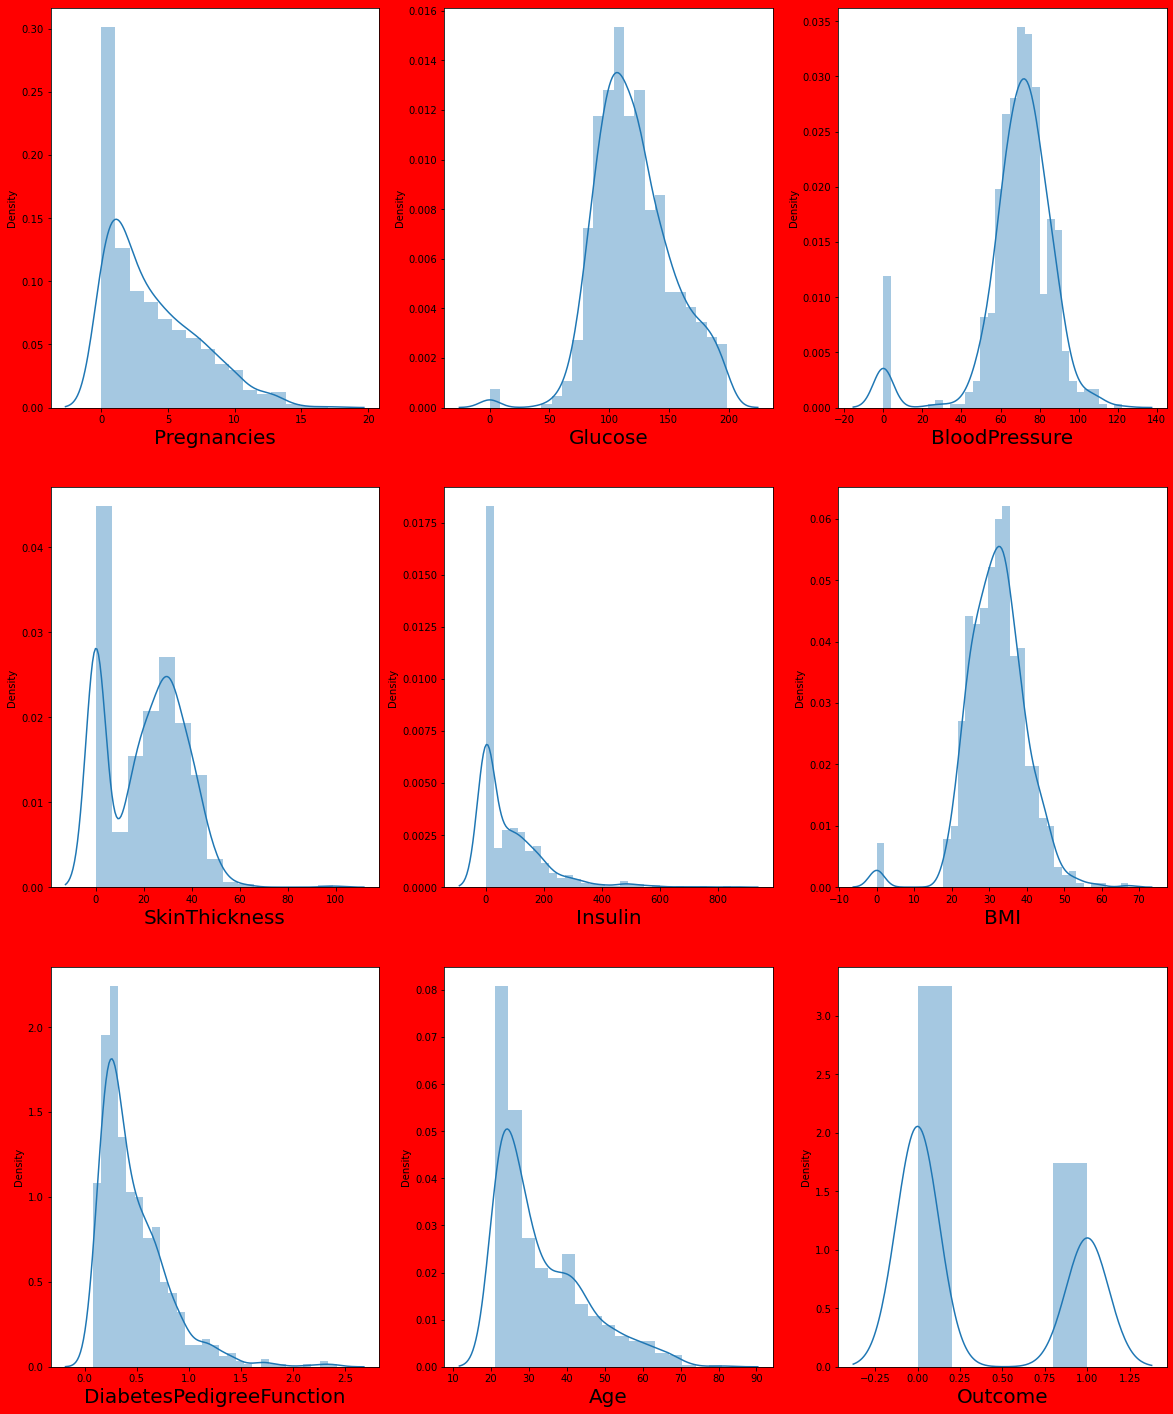

In [8]:
#Let's see how data is distributed for every column

plt.figure(figsize = (20,25), facecolor = 'red')

plotnumber = 1

for column in data:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
    
plt.show()

In [10]:
#Replacing 0 values with the mean of the column 

data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())

data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())

data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())

data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())


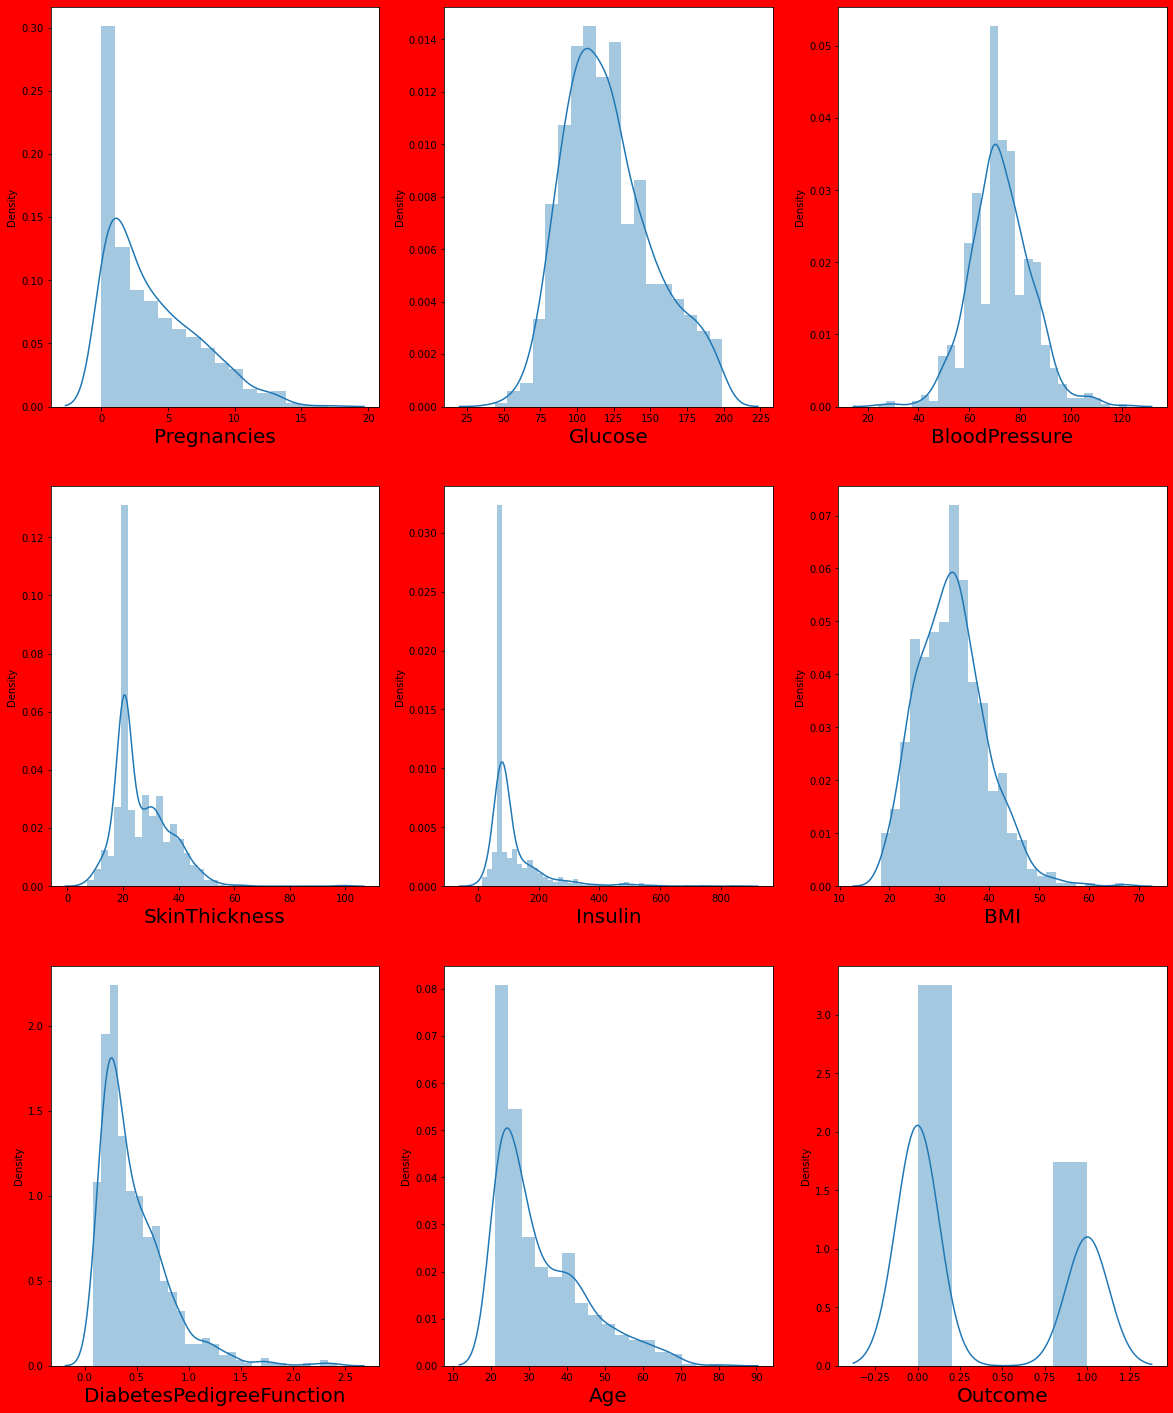

In [11]:
#let's see how data distributed for every column 

plt.figure(figsize = (20,25), facecolor = 'red')

plotnumber = 1

for column in data:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
    
plt.show()

In [12]:
df_features = data.drop('Outcome', axis = 1)


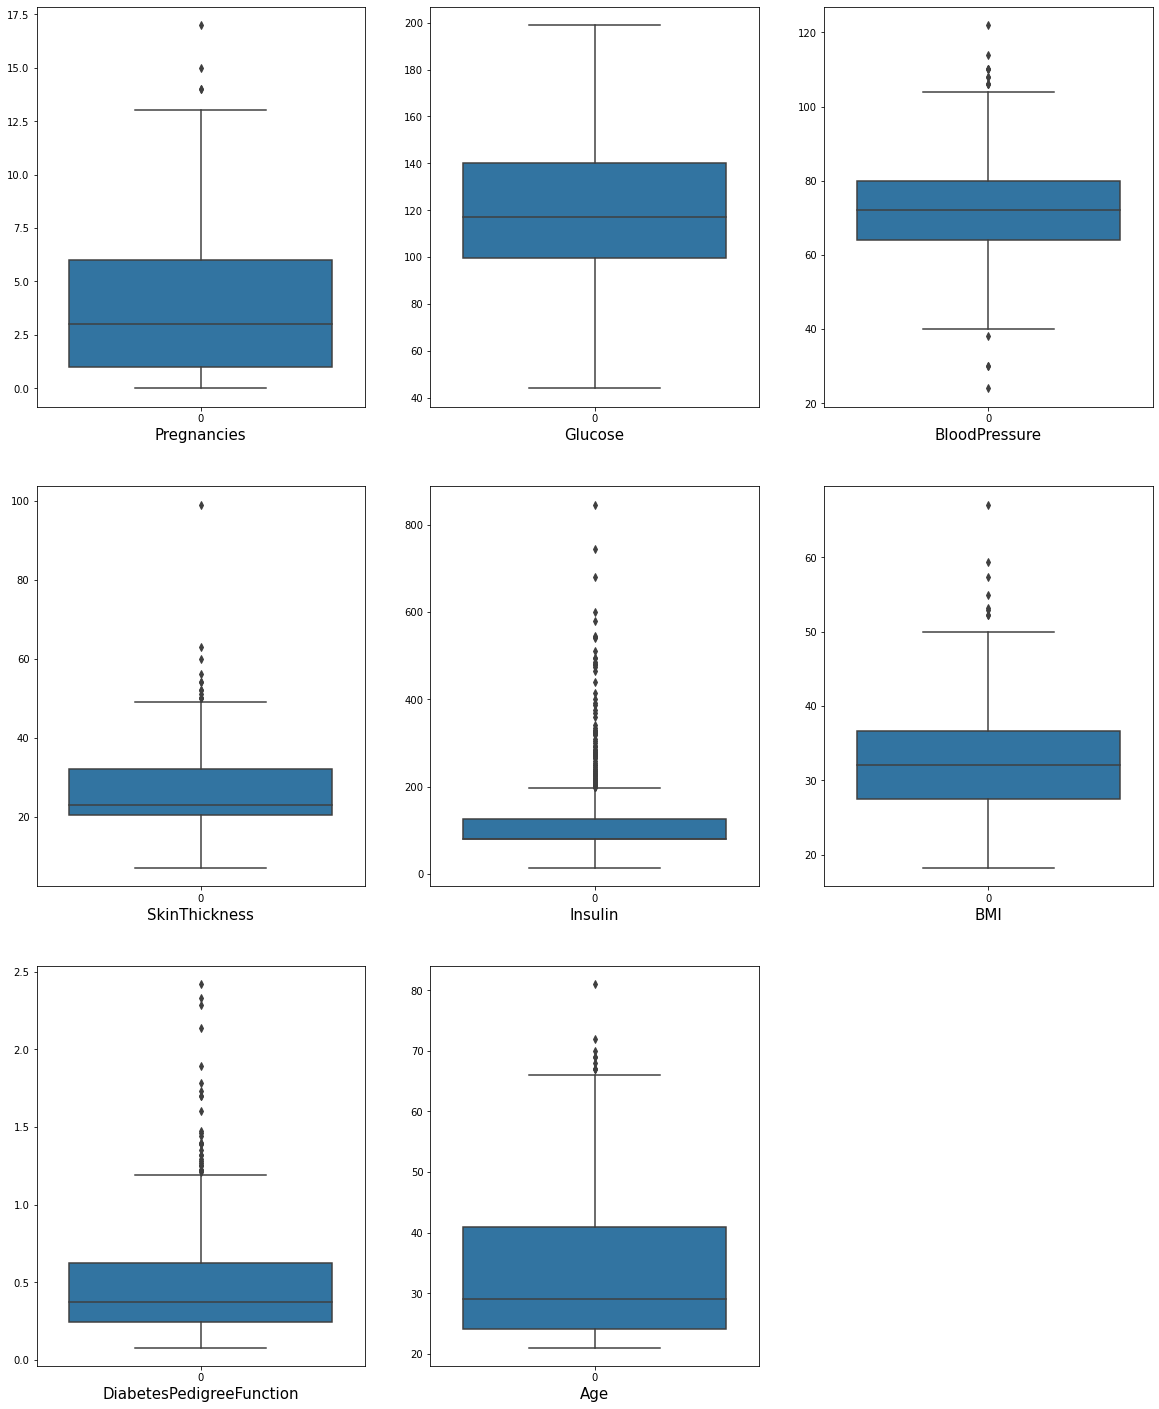

In [16]:
#Visualize the outliers using boxplot

plt.figure(figsize = (20,25))

graph = 1

for column in df_features:
    if graph <= 9:
        plt.subplot(3,3,graph)
        ax = sns.boxplot(data = df_features[column])
        plt.xlabel(column, fontsize = 15)
        
    graph += 1
    
plt.show()

In [17]:
data.shape

(768, 9)

In [18]:
#Find the IQR (inter quantile range) to identify outliers

#1st quantile

q1 = data.quantile(0.25)

#3rd Quantile

q3 = data.quantile(0.75)

#IQR

iqr = q3 - q1

In [19]:
#Outlier detection formula

#higher side==> Q3+(1.5*IQR)
#lower side==> Q1+(1.5*IQR)

In [20]:
#Validating one outlier

preg_high = (q3.Pregnancies+(1.5 * iqr.Pregnancies))
preg_high

13.5

In [21]:
#Check the indexs which have higher values

index = np.where(data['Pregnancies'] > preg_high)

index

(array([ 88, 159, 298, 455], dtype=int64),)

In [23]:
#Drop the index which we found in the bove cell.

data = data.drop(data.index[index])

data.shape

(764, 9)

In [24]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [25]:
bp_high = (q3.BloodPressure+(1.5 * iqr.BloodPressure))

print(bp_high)

104.0


In [33]:
index = np.where(data['BloodPressure'] > bp_high)

data = data.drop(data.index[index])

print(data.shape)



(742, 9)


In [30]:
st_high = (q3.SkinThickness + (1.5 * iqr.SkinThickness))

print(st_high)

49.1953125


In [34]:
data.reset_index

index

(array([], dtype=int64),)

In [31]:
index = np.where(data['SkinThickness'] > st_high)

data = data.drop(data.index[index])
print(data.shape)


(742, 9)


In [32]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [35]:
insu_high = (q3.Insulin + (1.5 * iqr.Insulin))
print(insu_high)

index = np.where(data['Insulin'] > insu_high)
data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

198.42578125
(657, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [36]:
bmi_high = (q3.BMI + (1.5 * iqr.BMI))
print(bmi_high)

index = np.where(data['BMI'] > bmi_high)
data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

50.25
(654, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [37]:
dpf_high = (q3.DiabetesPedigreeFunction + (1.5 * iqr.DiabetesPedigreeFunction))
print(dpf_high)

index = np.where(data['DiabetesPedigreeFunction'] > dpf_high)
data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

1.2
(631, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [38]:
age_high = (q3.Age + (1.5 * iqr.Age))
print(dpf_high)

index = np.where(data['Age'] > age_high)
data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

1.2
(622, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
617,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
618,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
619,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
620,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [40]:
bp_low = (q3.BloodPressure - (1.5 * iqr.BloodPressure))
print(bp_low)

index = np.where(data['BloodPressure'] > bp_low)
data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

56.0
(56, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,3,78.000000,50.0,32.000000,88.000000,31.0,0.248,26,1
1,18,1,103.000000,30.0,38.000000,83.000000,43.3,0.183,33,0
2,46,1,146.000000,56.0,20.536458,79.799479,29.7,0.564,29,0
3,51,1,101.000000,50.0,15.000000,36.000000,24.2,0.526,26,0
4,55,1,73.000000,50.0,10.000000,79.799479,23.0,0.248,21,0
5,75,1,120.894531,48.0,20.000000,79.799479,24.7,0.140,22,0
6,80,3,113.000000,44.0,13.000000,79.799479,22.4,0.140,22,0
7,90,1,80.000000,55.0,20.536458,79.799479,19.1,0.258,21,0
8,97,1,71.000000,48.0,18.000000,76.000000,20.4,0.323,22,0
9,98,6,93.000000,50.0,30.000000,64.000000,28.7,0.356,23,0


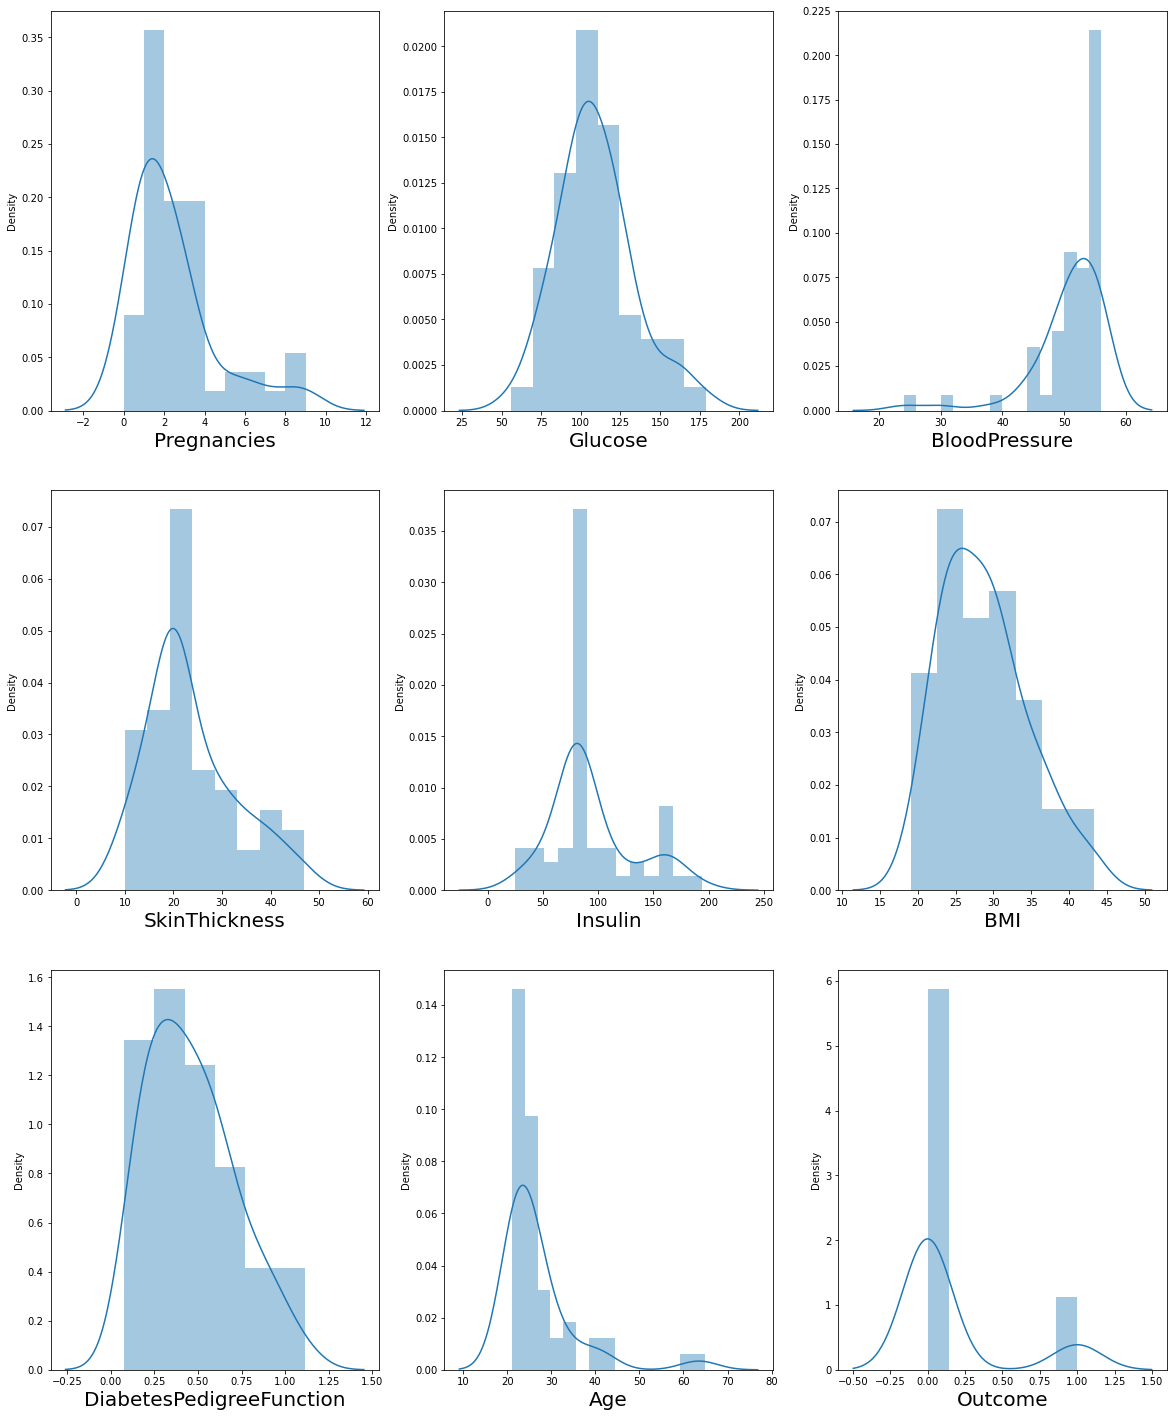

In [41]:
plt.figure(figsize = (20,25), facecolor = 'white')

plotnumber = 1

for column in data:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
    
plt.show()

In [43]:
x = data.drop(columns = ['Outcome'])
y = data['Outcome']

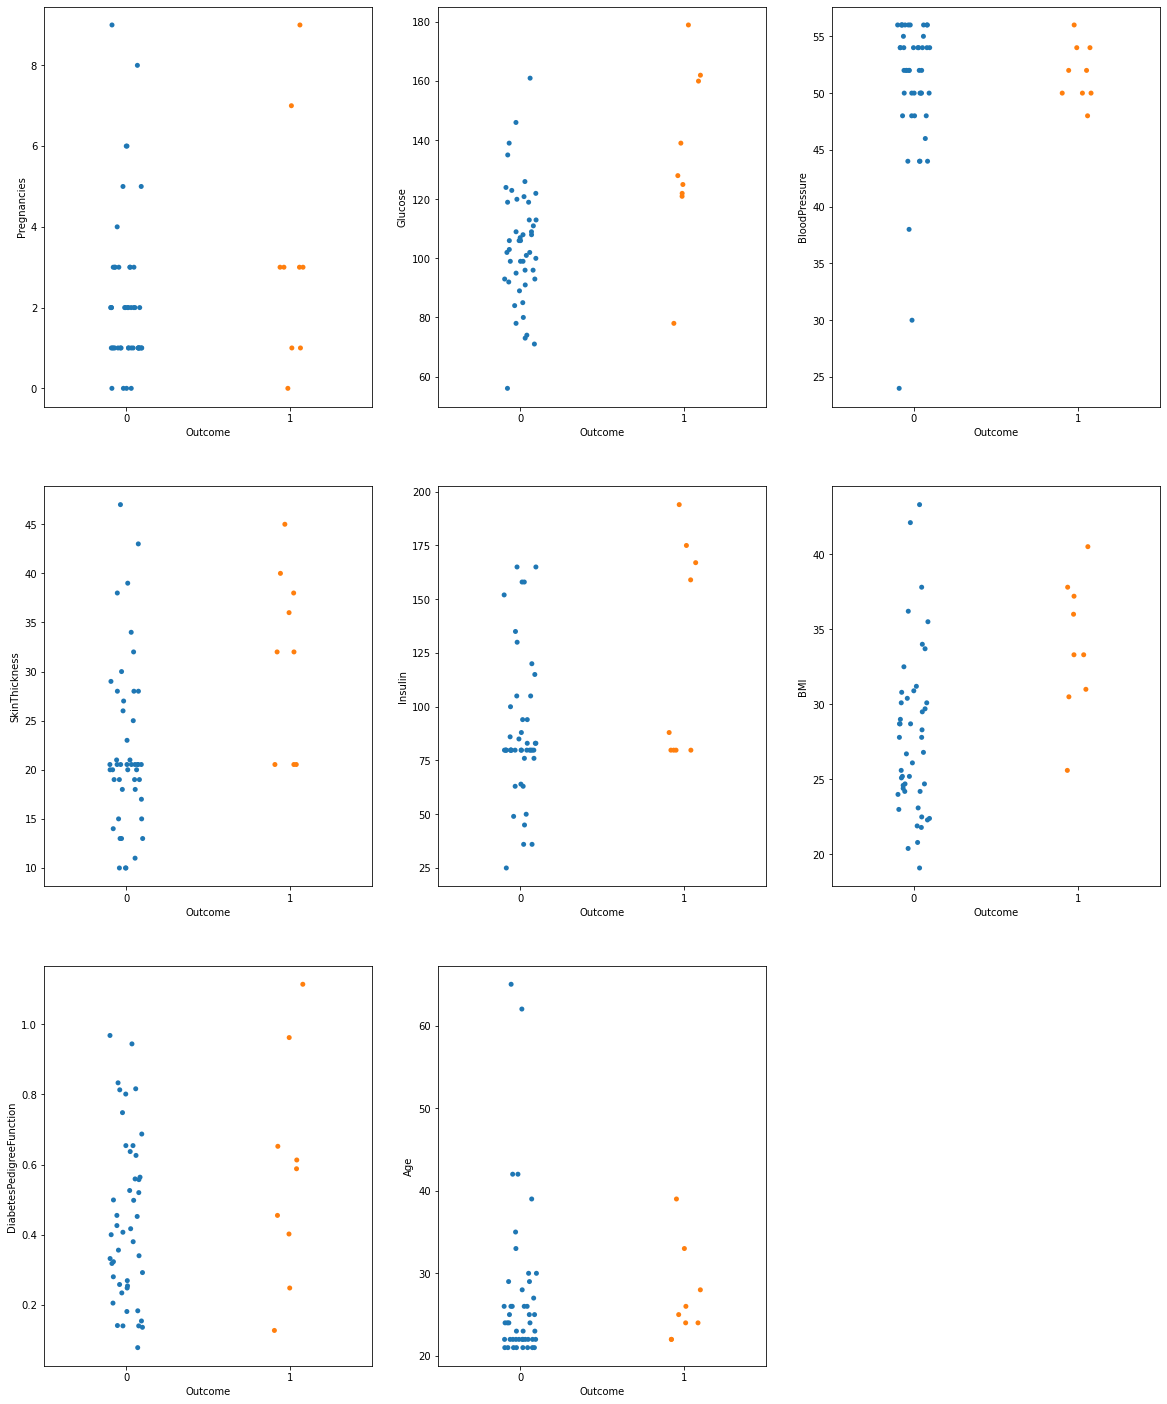

In [45]:
#Let's see how features are related to Class/Label.

plt.figure(figsize = (20,25))

plotnumber = 1

for column in x:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    
    plotnumber += 1
    
plt.show()

In [47]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

x_scaled

array([[ 2.84322283e-01, -1.29417391e+00, -1.24675745e-01,
         9.28768521e-01, -1.61658201e-01,  3.97584471e-01,
        -8.59421777e-01, -1.18086359e-01],
       [-6.52268768e-01, -2.57587639e-01, -3.44936228e+00,
         1.59194551e+00, -2.95580364e-01,  2.58493418e+00,
        -1.12063548e+00,  6.80014552e-01],
       [-6.52268768e-01,  1.52534075e+00,  8.72730217e-01,
        -3.38290991e-01, -3.81304499e-01,  1.66401168e-01,
         4.10478671e-01,  2.23956888e-01],
       [-6.52268768e-01, -3.40514541e-01, -1.24675745e-01,
        -9.50232955e-01, -1.55444870e+00, -8.11682034e-01,
         2.57769123e-01, -1.18086359e-01],
       [-6.52268768e-01, -1.50149117e+00, -1.24675745e-01,
        -1.50288045e+00, -3.81304499e-01, -1.02508201e+00,
        -8.59421777e-01, -6.88158439e-01],
       [-6.52268768e-01,  4.84381378e-01, -4.57144399e-01,
        -3.97585462e-01, -3.81304499e-01, -7.22765379e-01,
        -1.29343839e+00, -5.74144023e-01],
       [ 2.84322283e-01,  1.570468

In [48]:
#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

In [49]:
#Let's check values

vif

,vif,features
0,1.265381,Pregnancies
1,1.520116,Glucose
2,1.185169,BloodPressure
3,2.114385,SkinThickness
4,1.605371,Insulin
5,2.230808,BMI
6,1.207028,DiabetesPedigreeFunction
7,1.331799,Age


In [50]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 355)

log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)

LogisticRegression()

In [51]:
#let's see how well our Model perform on the test dataset.

y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [52]:
#Model Accuracy

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8571428571428571

In [53]:
#Confusion Matrix

conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[11,  0],
       [ 2,  1]], dtype=int64)

In [54]:
#ROC Curve

fpr, tpr, threshold = roc_curve(y_test, y_pred)

In [55]:
#Threshold 0 means no instances predicted (it should be read from 0 - max)

print('Threshold= ',threshold)
print('True Positive Rate= ',tpr)
print('False Positive Rate= ',fpr)

Threshold=  [2 1 0]
True Positive Rate=  [0.         0.33333333 1.        ]
False Positive Rate=  [0. 0. 1.]


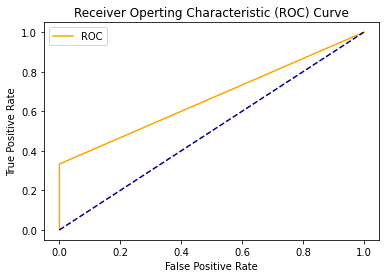

In [58]:
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operting Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [59]:
#How much Area it is covering(AUC)

auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)


0.6666666666666666
